In [18]:
import numpy as np
import matplotlib.pylab as plt
from ugradio.dft import dft

plt.rcParams.update({'font.size': 24})

In [2]:
def freq_to_period(freq):
    '''take frequency (in kHz)
    and converts to period (in microseconds)'''
    return (1/freq) * 1000

# SDR captured SSB data
$\nu_{LO} = 26$ MHz

$\nu_{RF} = 27$ MHz

In [3]:
# array containing the voltage outputs for all the different frequencies
all_data = {}
for i in range(5, 7):
    fname = '../data_sec7/ssb_digital_3200_' + str(i) + '.npy'
    data = np.load(fname)[0]
    all_data[i] = data

samp_freq = 3200 # kHz

# 5.3

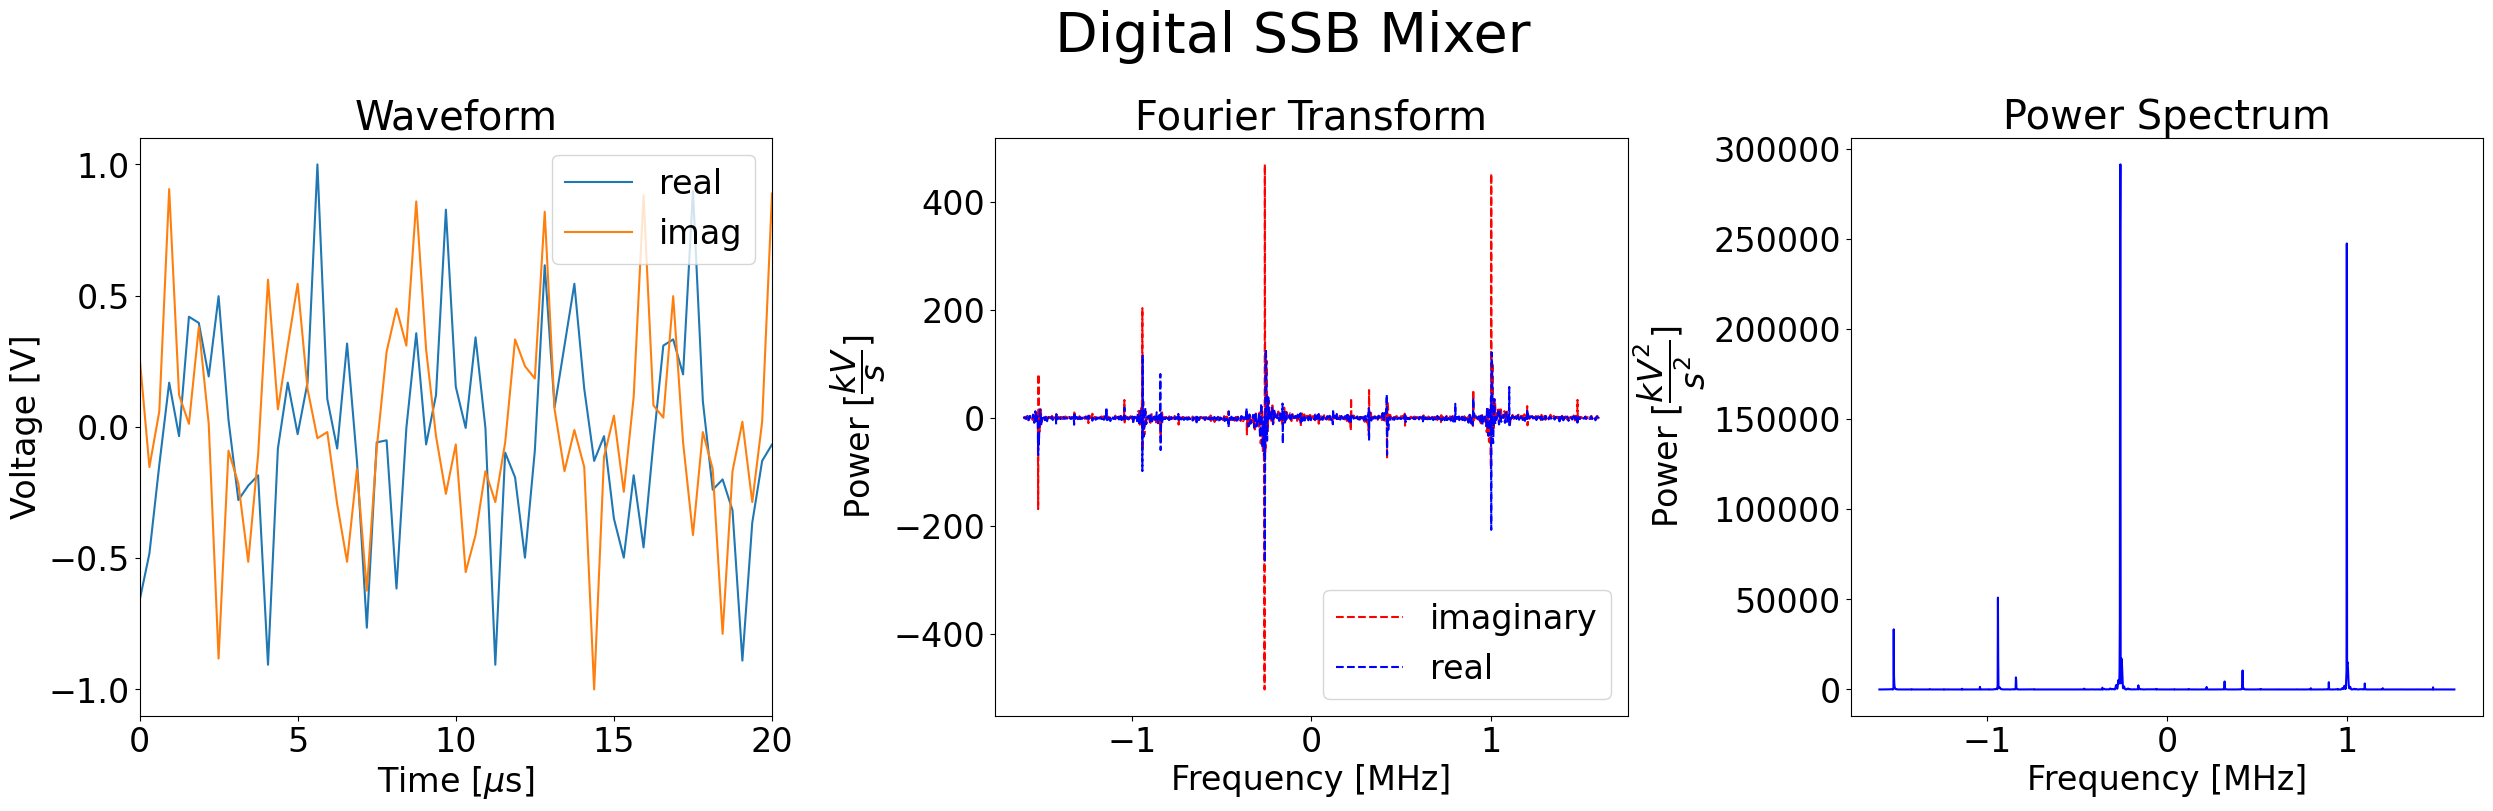

In [28]:
def complex_plotter():
    samp_freq = 3200
    data = all_data[5]
    time = np.arange(len(data)) * freq_to_period(samp_freq) # in microseconds

    fig, axs = plt.subplots(1, 3,  figsize=(27, 9))
    fig.tight_layout(pad=4.0)
    fig.suptitle("Digital SSB Mixer", fontsize=40)

    wave = axs[0]
    wave.plot(time, data.real, color="blue", label='real')
    wave.plot(time, data.imag, color="red", label='imaginary')
    wave.set_title('Waveform')
    wave.set_xlabel(r'Time [$\mu$s]')
    wave.set_xlim(0, 20)
    wave.set_ylabel('Voltage [V]')
    wave.legend()

    ft = axs[1]
    f, Fx = dft(data, vsamp=samp_freq/1000)
    ft.plot(f, Fx.imag, label='imaginary', color="red", linestyle='dashed')
    ft.plot(f, Fx.real, label='real', color="blue", linestyle='dashed')
    # ft.axvline(x = 800, color='orange', label = '800 kHz Signal Freq', linestyle='dashed')
    # ft.axvline(x = -800, color='orange', linestyle='dashed')
    ft.set_title('Fourier Transform')
    ft.set_xlabel(r'Frequency [MHz]')
    # ft.set_xlim(-1000, 1000)
    ft.set_ylabel('Power [$\dfrac{kV}{s}$]')
    ft.legend()

    ps = axs[2]
    ps.plot(f, np.abs(Fx)**2, color="blue")
    # plt.axvline(x = 800, color='orange', label = '800 kHz Signal Freq', linestyle='dashed')
    # plt.axvline(x = -800, color='orange', linestyle='dashed')
    ps.set_title('Power Spectrum')
    ps.set_xlabel(r'Frequency [MHz]')
    # ps.set_xlim(-1000, 1000)
    ps.set_ylabel('Power [$\dfrac{kV^2}{s^2}$]')

    plt.show()

complex_plotter()